# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [28]:
import pandas as pd

# Read in tsv file from SWAN data
SWAN = pd.read_csv('32961-0001-Data.tsv', sep = '\t')

# Read in SAS file from NHANES 
NHANES_osteoporosis = pd.read_sas('OSQ_E.XPT')

In [9]:
# View the rows and columns for each data file
SWAN.head

<bound method NDFrame.head of       SWANID  VISIT AGE10 INTDAY10 LANGINT10 PRGNAN10 ANTICO110 ACOATW110  \
0      10046     10    62     3768         1        1         1        -1   
1      10056     10    61     3660         1        1         1        -1   
2      10153     10    61     3635         1        1         1        -1   
3      10196     10    56     3634         1        1         1        -1   
4      10245     10    57     3612         1        1         1        -1   
...      ...    ...   ...      ...       ...      ...       ...       ...   
2240   99805     10    52     3661         1        1         1        -1   
2241   99809     10    53     3624         1        1         1        -1   
2242   99888     10    58     3661         1        1         1        -1   
2243   99898     10    55     3626         1        1         1        -1   
2244   99962     10    57     3647         3        1         1        -1   

     ANTICO210 ACOATW210  ...        TBWNHAN1

In [8]:
NHANES_osteoporosis.head

<bound method NDFrame.head of          SEQN  OSQ010A  OSQ010B  OSQ010C  OSQ020A  OSQ020B  OSQ020C  OSD030AA  \
0     41475.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
1     41477.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
2     41479.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
3     41481.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
4     41482.0      2.0      1.0      2.0      NaN      1.0      NaN       NaN   
...       ...      ...      ...      ...      ...      ...      ...       ...   
5930  51618.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
5931  51619.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
5932  51620.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
5933  51622.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN   
5934  51623.0      2.0      2.0      2.0      NaN      NaN      NaN       NaN  

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [19]:
# Calculate the number of unique values for each column and assign to an object
NHANES_unique = NHANES_osteoporosis.nunique()

# Return the 5 largest 
NHANES_unique.nlargest(5)

SEQN        5935
OSD030BA      77
OSQ180        67
OSD030CA      59
OSD110A       58
dtype: int64

"SEQN" is the unique respondent identifier. The greatest number of distinct values beyond this column is "OSD030BA" which corresponds to the question "How old {were you/was SP} when {you/s/he} fractured {your/his/her} wrist the 1st time?"

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [20]:
# From the unique NHANES data - determine the columns with the smallest number of unique values
NHANES_unique.nsmallest(1, 'all')

OSD050AB    1
OSD030AC    1
OSQ040AC    1
OSD050AC    1
OSD030AD    1
OSQ040AD    1
OSD050AD    1
OSD030AE    1
OSQ040AE    1
OSD050AE    1
OSQ040BD    1
OSQ040BE    1
OSQ040BF    1
OSQ040BG    1
OSD050CC    1
OSD030CD    1
OSQ040CD    1
OSD050CD    1
OSD030CE    1
OSQ040CE    1
OSD050CE    1
OSQ090I     1
OSQ120I     1
OSQ090J     1
OSQ120J     1
OSQ160A     1
OSQ160B     1
dtype: int64

The columns listed above all have 1 unique value, suggesting the responses are all the same. Given the prevalence of NaN values listed in the initial glimpse of the data, I suspect these are columns with large numbers of NA values. ".nunique" does not include NA values in the count. 

In [22]:
# Test the values for one of the identified columns
NHANES_osteoporosis['OSQ120J'].value_counts()

1.0    4
Name: OSQ120J, dtype: int64

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

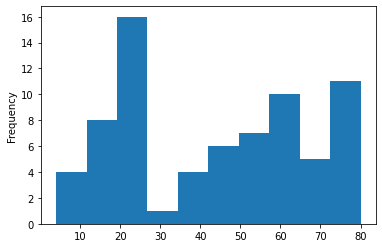

In [29]:
# Plot the ages at first hip fracture
NHANES_osteoporosis['OSD030AA'].plot(kind = 'hist')

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

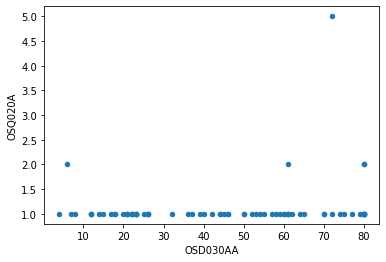

In [33]:
# Examining correlations between the number of times hip has been fractured and age at first hip fracture
hip_plot = NHANES_osteoporosis.plot.scatter(x = 'OSD030AA', y = "OSQ020A", 
                                            xlabel = "Age at first hip fracture", 
                                 ylabel = "Number of hip fractures")



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [1]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week13_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 



    
OK. We can wait.

